In [1]:
import pandas
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [40]:
df = pandas.read_pickle('./models_sampling/result.pkl')

In [58]:
def df_postprocessing(df):
    data = {}
    for nump in df['num_params'].unique():
        data[nump] = df[df['num_params']==nump]
    return data

<ErrorbarContainer object of 3 artists>

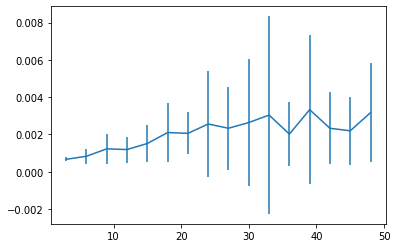

In [65]:
data = df_postprocessing(df)
mean_ = list(map(lambda x: x['mse'].mean(), data.values()))
std_ = list(map(lambda x: x['mse'].std(), data.values()))
plt.errorbar(x=list(data.keys()), y=mean_, yerr=std_)

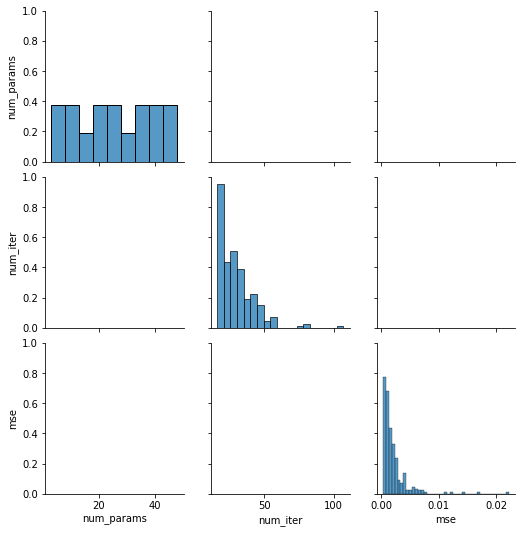

In [66]:
g=sns.PairGrid(df)
g.map_diag(sns.histplot)

<AxesSubplot:xlabel='num_params', ylabel='num_iter'>

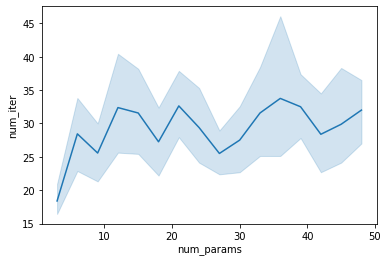

In [83]:
df['1/mse']=df['mse'].map(lambda x: 1/x)
sns.lineplot(data=df, x='num_params', y='num_iter')

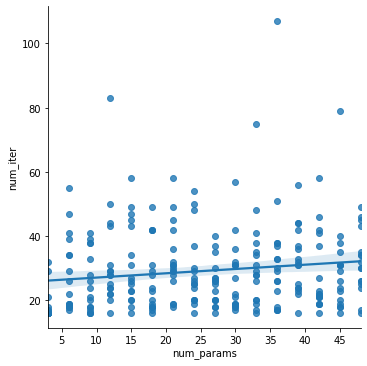

In [86]:
sns.lmplot(data=df, x="num_params", y="num_iter")


<AxesSubplot:xlabel='num_iter', ylabel='mse'>

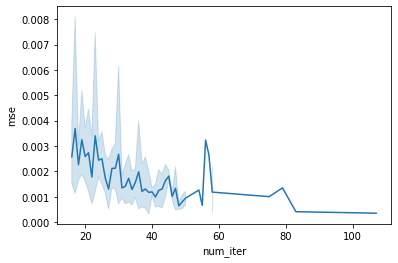

In [91]:
sns.lineplot(data=df, x='num_iter', y='mse', )

In [1]:
import sys 
sys.path.append('/home/quic/QUIC-Projects')
import numpy as np 

In [13]:
from pathlib import Path
from uuid import uuid4
from shutil import copy
dir_path = Path('./models_last4_8data_circ9')
target_path = Path('./circ9_N=8_last4')
for sub_path in dir_path.glob('*'):
    if sub_path.is_dir():
        for i in range(1, 17):
            sample_id = uuid4()
            for sub_file in sub_path.glob(f'*(reps={i})*'):
                Path.mkdir(target_path/str(sample_id), exist_ok=True, parents=True)
                copy(sub_file, target_path/str(sample_id))

In [3]:
true_regression = np.load(dir_path/'0'/'true_regression.npy')

In [4]:
def mean_square_error(regression:np.ndarray, true_val:np.ndarray):
    est = regression.mean(axis=0)
    var = regression.std(axis=0)**2
    bias2 = (est-true_val)**2
    return np.sqrt((bias2+var).mean())

In [11]:
from pathlib import Path
from uuid import uuid4
from shutil import copy
import dill
import numpy as np
from pandas import DataFrame

target_path = Path('./circ_9')
df = DataFrame(columns=['num_params', 'num_iter', 'mse'])
for sub_path in target_path.glob('*'):
    if sub_path.is_dir():
        for sub_file in sub_path.glob('qasvm*'):
            with sub_file.open('rb') as f:
                qasvm = dill.load(f)
            num_params = qasvm.num_parameters
        for sub_file in sub_path.glob('storage*'):
            with sub_file.open('rb') as f:
                storage = dill.load(f)
            num_iter = storage.num_accepted()
        for sub_file in sub_path.glob('regression*.npy'):
            regression = np.load(sub_file)
            mse = mean_square_error(regression=regression, true_val=true_regression)
        df = df.append(dict(num_params=num_params, num_iter=num_iter, mse=mse), ignore_index=True)
        
df.to_csv(Path(target_path/'result.csv'))
df.to_pickle(Path(target_path/'result.pkl'))

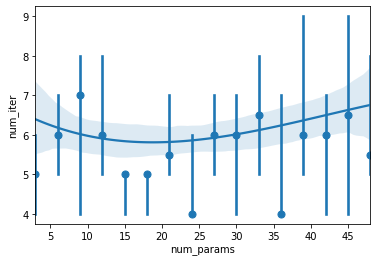

In [8]:
import pandas
import seaborn as sns 
df = pandas.read_pickle(target_path/'result.pkl')
ax = sns.regplot(data=df, x='num_params', y='num_iter', order=3, ci=99, x_estimator=np.median)

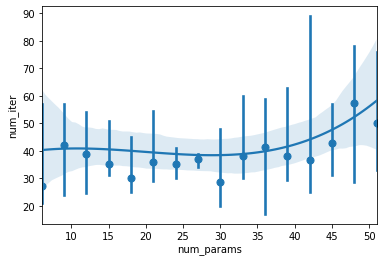

In [43]:
df = pandas.read_pickle('./real_amp/result.pkl')
ax = sns.regplot(data=df[df['mse']<df['mse'].mean()], x='num_params', y='num_iter', order=3, ci=99, x_estimator=np.median)

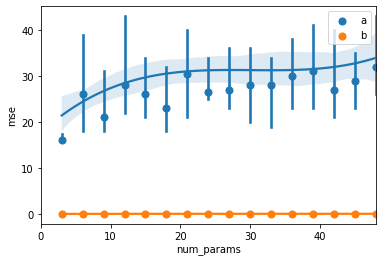

In [64]:
import pandas
df = pandas.read_pickle('./circ_9/result.pkl')
ax = sns.regplot(data=df, x='num_params', y='num_iter', order=3, ci=99, x_estimator=np.median, label='a')
ax = sns.regplot(data=df, x='num_params', y='mse', order=3, ci=99, x_estimator=np.mean, ax=ax, label='b')
ax.set_xlim([0, None])
ax.legend()

<ipython-input-71-b18fbcd0d34a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(map(str, range(6, 52, 3)))
<ipython-input-71-b18fbcd0d34a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(map(str, range(6, 52, 3)))


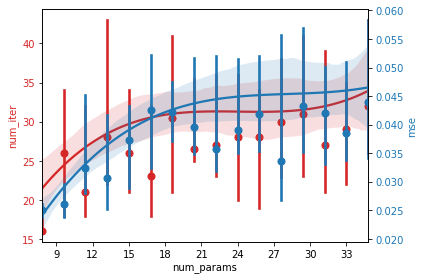

In [71]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
sns.regplot(data=df, x='num_params', y='num_iter', order=3, ci=99, x_estimator=np.median, label='a', ax=ax1, color=color)
#sns.boxplot(data=df, x='num_params', y='num_iter', ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(map(str, range(6, 52, 3)))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax = sns.regplot(data=df, x='num_params', y='mse', order=3, ci=99, x_estimator=np.median, label='b', ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticklabels(map(str, range(6, 52, 3)))


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

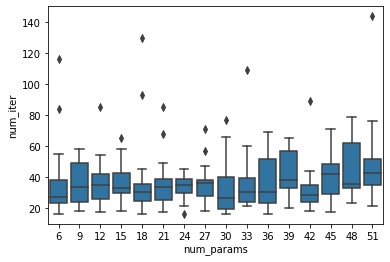

In [61]:
ax1 = sns.boxplot(data=df, x='num_params', y='num_iter', color=color)
_=ax1.set_xticklabels(map(str, range(6, 52, 3)))


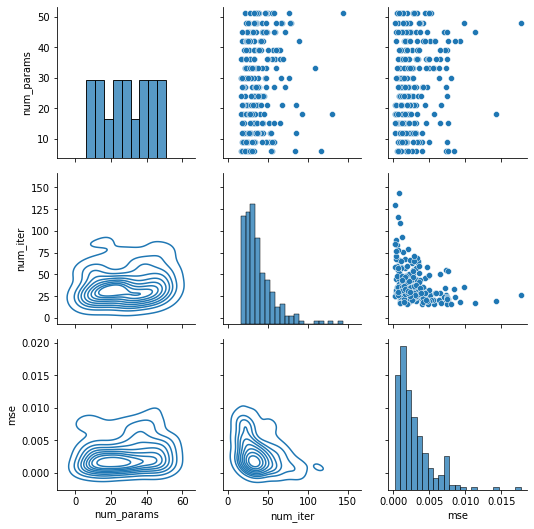

In [63]:
g = sns.PairGrid(data=df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

In [72]:
from qiskit.circuit.library import PauliTwoDesign
help(PauliTwoDesign)

Help on class PauliTwoDesign in module qiskit.circuit.library.n_local.pauli_two_design:

class PauliTwoDesign(qiskit.circuit.library.n_local.two_local.TwoLocal)
 |  PauliTwoDesign(num_qubits: Optional[int] = None, reps: int = 3, seed: Optional[int] = None, insert_barriers: bool = False)
 |  
 |  The Pauli Two-Design ansatz.
 |  
 |  This class implements a particular form of a 2-design circuit [1], which is frequently studied
 |  in quantum machine learning literature, such as e.g. the investigating of Barren plateaus in
 |  variational algorithms [2].
 |  
 |  The circuit consists of alternating rotation and entanglement layers with
 |  an initial layer of :math:`\sqrt{H} = RY(\pi/4)` gates.
 |  The rotation layers contain single qubit Pauli rotations, where the axis is chosen uniformly
 |  at random to be X, Y or Z. The entanglement layers is compromised of pairwise CZ gates
 |  with a total depth of 2.
 |  
 |  For instance, the circuit could look like this (but note that choosing a